## Множественная регрессия

### Задание 
Построить регрессионную модель спрогнозировать число сданных в аренду велосипедов с использованием множественной регрессии. Ввести граничное значение (экономически выгодное значение числа сданных в аренду) для велосипедов и ввести дополнительную колонку (колонку класса) означающую эффективность или нет (1 или 0). Построить модель классификации для предсказания дней эффективной работы. Сравнить качество моделей предсказания дней эффективной работы (модели регрессии и классификации)


### Данные
* DataSet5_2 – Данные об аренде велосипедов

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv('DataSet5_2.csv', sep = ',')

In [57]:
data.head()

,count,holiday,humidity,registered,summer,temp,windspeed,workingday
0,2,0,81,2,0,10.66,22.0028,1
1,157,0,54,150,1,18.04,16.9979,1
2,233,0,40,199,1,37.72,15.0013,1
3,98,0,88,86,1,22.14,19.0012,1
4,6,0,74,6,0,6.56,6.0032,1


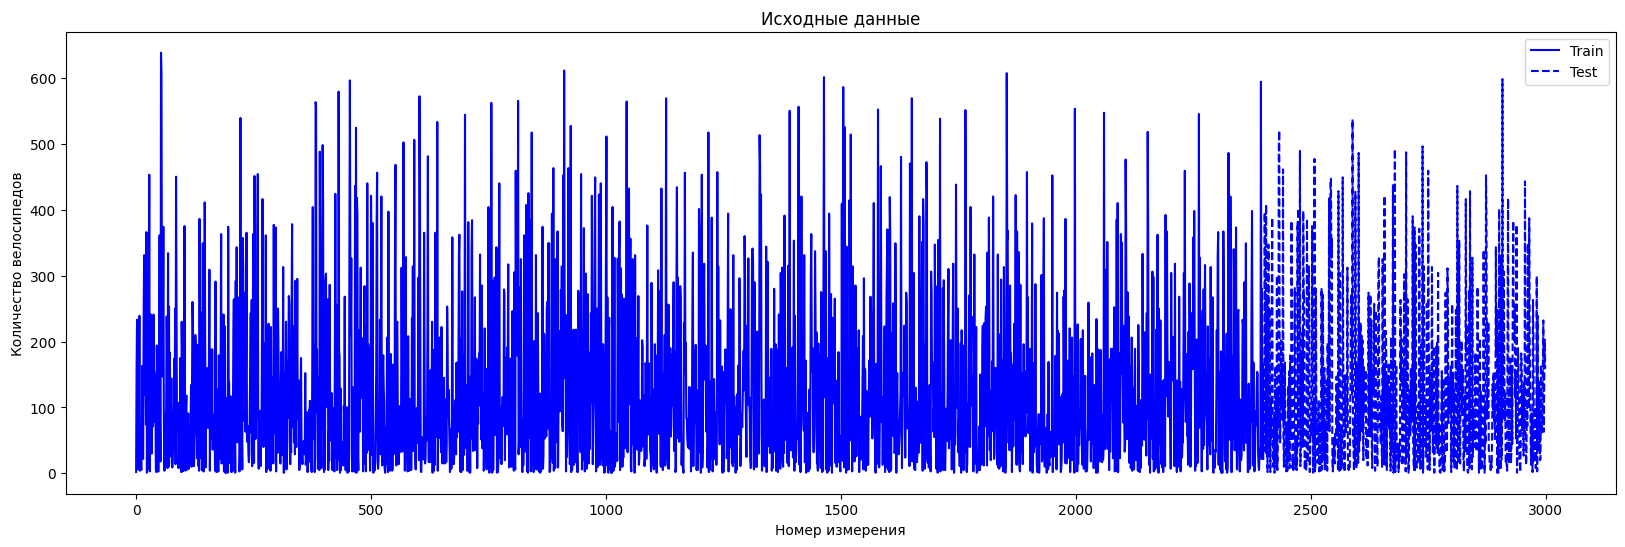

In [58]:
start_idx = 0
end_idx = len(data)

n = round(0.8*(end_idx - start_idx))

train = data[0:n]
test = data[n:]

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(train['count'].index, train['count'], color='blue', linestyle = 'solid')
ax.plot(test['count'].index, test['count'], color='blue', linestyle = 'dashed')

ax.set(title="Исходные данные", xlabel="Номер измерения", ylabel="Количество велосипедов")

ax.legend(['Train', 'Test'])
plt.show()

In [59]:
train_x = train.drop(['count'], axis=1, inplace=False)
train_y = train['count']
test_x = test.drop(['count'], axis=1, inplace=False)
test_y = test['count']

## Регрессия

In [60]:
# https://stackoverflow.com/questions/48505727/is-there-an-equivalent-of-rs-nls-in-statsmodels
# https://pypi.org/project/lmfit/
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# https://timeseriesreasoning.com/contents/nonlinear-least-squares-nls-regression/

In [91]:
from scipy.optimize import curve_fit 

def mapping_func(x, a, b, c, d, e, i, j): 
    return a + b*x['holiday'] + c*x['humidity'] + d*x['summer'] + e*x['temp'] + i*x['windspeed'] + j*x['workingday']

args, covar = curve_fit(mapping_func, train_x, train_y)

a, b, c, d, e, i, j = args[0], args[1], args[2], args[3], args[4], args[5], args[6]

res_y_tr = a + b*train['holiday'] + c*train['humidity'] + d*train['summer'] + e*train['temp'] + i*train['windspeed'] + j*train['workingday']
res_y_ts = a + b*test['holiday'] + c*test['humidity'] + d*test['summer'] + e*test['temp'] + i*test['windspeed'] + j*test['workingday']
res_y = list(res_y_tr)+list(res_y_ts)

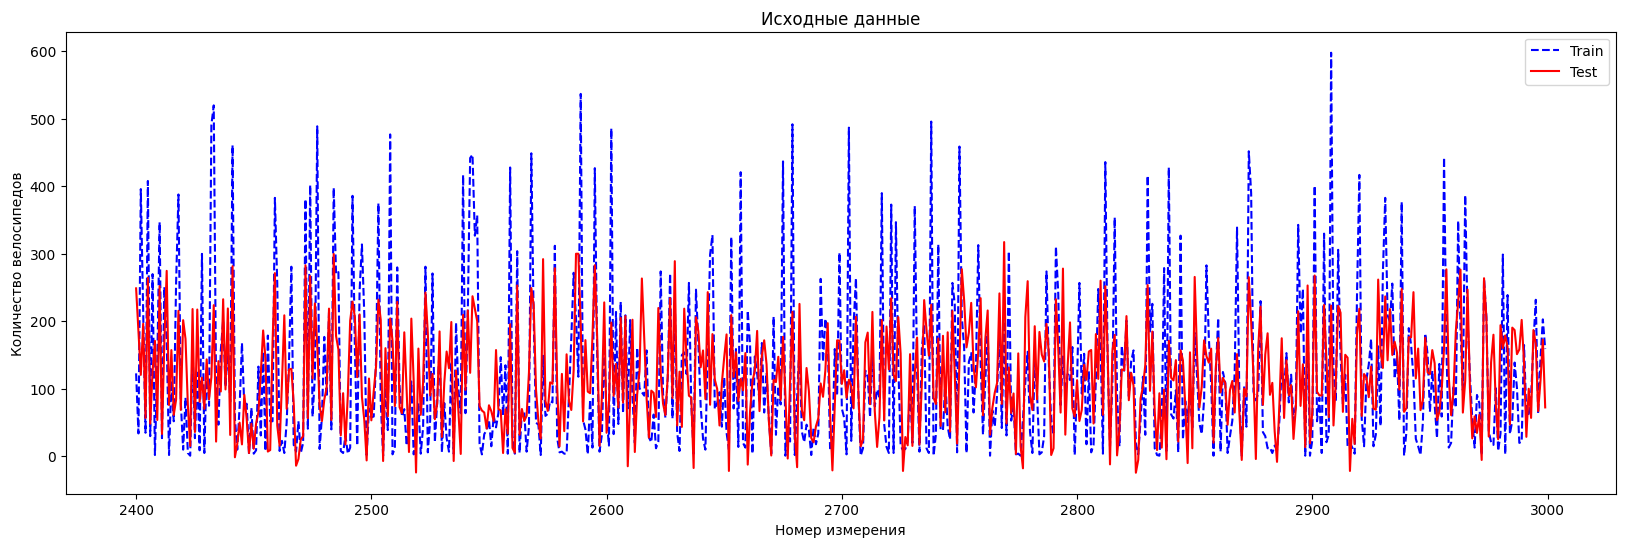

In [65]:
fig, ax = plt.subplots(figsize=(20, 6))

# ax.plot(train['count'].index, train['count'], color='blue', linestyle = 'solid')
# ax.plot(train['count'].index, res_y_tr, color='red', linestyle = 'solid')
ax.plot(test['count'].index, test['count'], color='blue', linestyle = 'dashed')
ax.plot(test['count'].index, res_y_ts, color='red', linestyle = 'solid')

ax.set(title="Исходные данные", xlabel="Номер измерения", ylabel="Количество велосипедов")

ax.legend(['Train', 'Test'])
plt.show()

In [68]:
data2 = data.sort_values(by='count').reset_index()

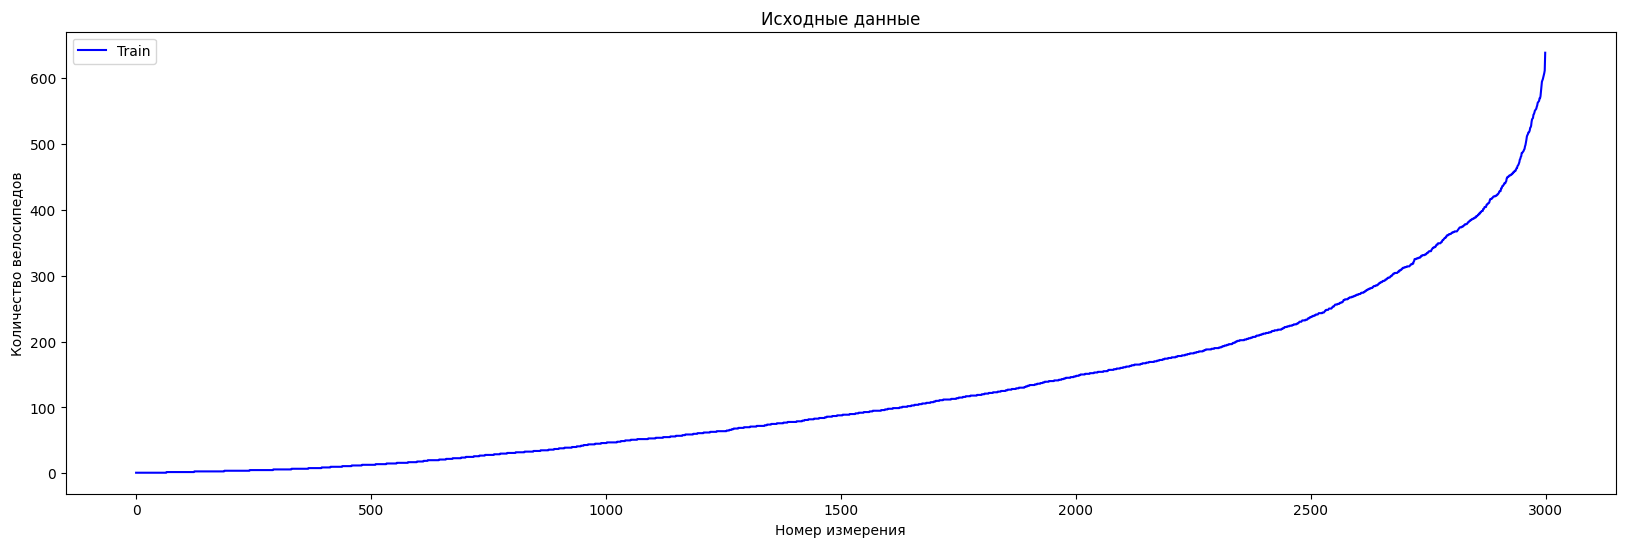

In [69]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(data2['count'].index, data2['count'], color='blue', linestyle = 'solid')

ax.set(title="Исходные данные", xlabel="Номер измерения", ylabel="Количество велосипедов")

ax.legend(['Train', 'Test'])
plt.show()

In [70]:
test_x2 = data2.drop(['count'], axis=1, inplace=False)
res_y_ts2 = a + b*test_x2['holiday'] + c*test_x2['humidity'] + d*test_x2['summer'] + e*test_x2['temp'] + i*test_x2['windspeed'] + j*test_x2['workingday']

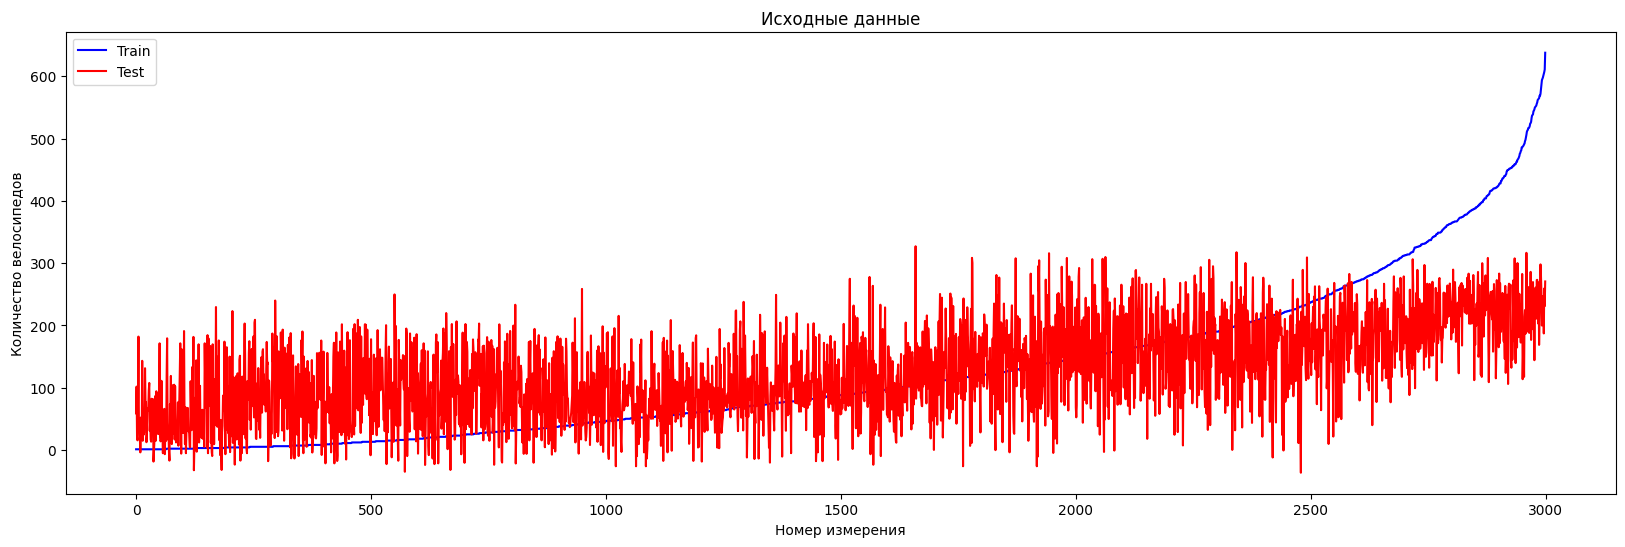

In [75]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(data2['count'].index, data2['count'], color='blue', linestyle = 'solid')
ax.plot(data2['count'].index, res_y_ts2, color='red', linestyle = 'solid')

ax.set(title="Исходные данные", xlabel="Номер измерения", ylabel="Количество велосипедов")

ax.legend(['Train', 'Test'])
plt.show()

In [94]:
res1 = pd.DataFrame()
res2 = pd.DataFrame()

res1 = [1 if data['count'][i] > 100 else 0 for i in range(len(data))]
res2 = [1 if res_y[i] > 100 else 0 for i in range(len(res_y))]

In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [131]:
precision = round(precision_score(res1, res2) * 100, 2)
recall = round(recall_score(res1, res2) * 100, 2)
accuracy = round(accuracy_score(res1, res2) * 100, 2)
f1 = round(f1_score(res1, res2) * 100, 2)
roc_auc = round(roc_auc_score(res1, res2) * 100, 2)

print('precision:', precision)
print('recall:', recall)
print('accuracy:', accuracy)
print('f1:', f1)
print('roc_auc:', roc_auc)

precision: 65.29
recall: 84.22
accuracy: 72.37
f1: 73.56
roc_auc: 73.32


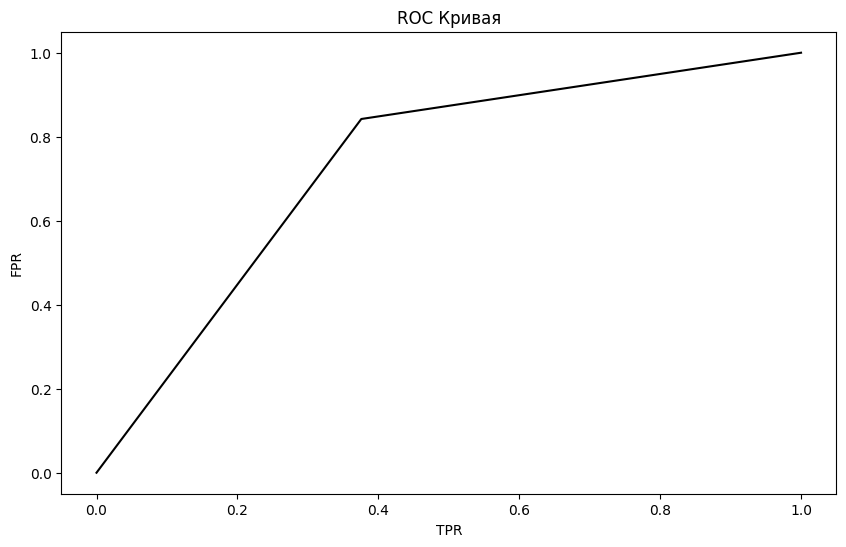

In [133]:
fpr, tpr, _ = roc_curve (res1, res2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fpr,tpr, color='black', linestyle = 'solid')
ax.set(title="ROC Кривая", xlabel="TPR", ylabel="FPR")
plt.show()

## Классификация

In [121]:
data_cl = data
data_cl['cls'] = [1 if data['count'][i] > 100 else 0 for i in range(len(data))]

In [122]:
train_cl_x = data_cl.drop(['cls'], axis=1, inplace=False)[0:n]
train_cl_y = data_cl['cls'][0:n]

In [145]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_cl_x, train_cl_y)
# neigh.fit(train_x.reshape(-1, 1), train_y)

KNeighborsClassifier(n_neighbors=3)

In [146]:
res_y_cl = neigh.predict(data_cl.drop(['cls'], axis=1, inplace=False))

In [147]:
precision = round(precision_score(data_cl['cls'], res_y_cl) * 100, 2)
recall = round(recall_score(data_cl['cls'], res_y_cl) * 100, 2)
accuracy = round(accuracy_score(data_cl['cls'], res_y_cl) * 100, 2)
f1 = round(f1_score(data_cl['cls'], res_y_cl) * 100, 2)
roc_auc = round(roc_auc_score(data_cl['cls'], res_y_cl) * 100, 2)

print('precision:', precision)
print('recall:', recall)
print('accuracy:', accuracy)
print('f1:', f1)
print('roc_auc:', roc_auc)

precision: 99.27
recall: 99.34
accuracy: 99.37
f1: 99.31
roc_auc: 99.36


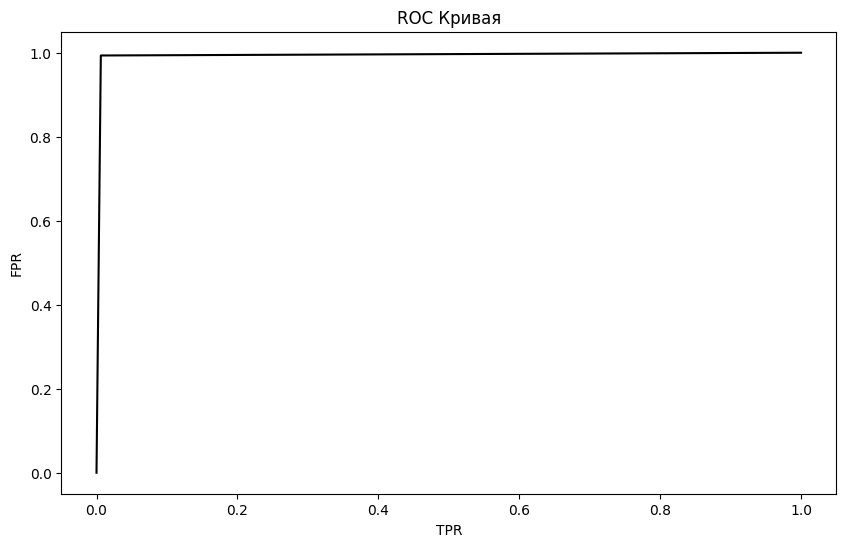

In [148]:
fpr, tpr, _ = roc_curve (data_cl['cls'], res_y_cl)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fpr,tpr, color='black', linestyle = 'solid')
ax.set(title="ROC Кривая", xlabel="TPR", ylabel="FPR")
plt.show()